## Apply PCA for a dataset given in the url, build a classification model and plot the graph

### Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append('/home/admin1/PycharmProjects/Machine Learning using libraries/')
import os
os.chdir('/home/admin1/PycharmProjects/Machine Learning using libraries/Classification/Datasets & pickled objects/')
from ipynb.fs.full.ml_library import *

# reading dataset from file & storing it as pandas dataframe
social_network_data = pd.read_csv('Social_Network_Ads.csv')
social_network_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
social_network_data.info()       # observing datatypes of different columns & checking null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


#### Separating out feature colums & label column 

In [3]:
x_values = social_network_data.iloc[:,[2,3]].values
y_values = social_network_data.iloc[:,-1].values

#### Splitting dataset into train set & test set

In [4]:
from sklearn.model_selection import train_test_split
train_x_values, test_x_values, train_y_values, test_y_values = train_test_split(x_values, y_values, train_size=0.8, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
train_x_values = sc_x.fit_transform(train_x_values)
test_x_values = sc_x.transform(test_x_values)

#### Applying Principal Component Analysis (PCA)

In [6]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf')
train_x_values = kpca.fit_transform(train_x_values)
test_x_values = kpca.transform(test_x_values)

### Building Logistic Regression model

In [7]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(train_x_values, train_y_values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Storing essential objects into pickle file

In [8]:
import joblib

file = open('StdScalingAdClick.pkl', 'wb')
joblib.dump(sc_x, file)
file.close()

file = open('KPCALogisticModelAdClick.pkl', 'wb')
joblib.dump(kpca, file)
joblib.dump(classifier, file)
file.close()

#### Storing predictions for test set

In [9]:
test_prediction = classifier.predict(test_x_values)

### Evaluating model against test set 

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
print(f'Confusion matrix:\n {confusion_matrix(test_y_values, test_prediction)}')
print(f'\nAccuracy score: {accuracy_score(test_y_values, test_prediction)}')
print(f'\nClassification report:\n {classification_report(test_y_values, test_prediction)}')

Confusion matrix:
 [[54  4]
 [ 4 18]]

Accuracy score: 0.9

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        58
           1       0.82      0.82      0.82        22

    accuracy                           0.90        80
   macro avg       0.87      0.87      0.87        80
weighted avg       0.90      0.90      0.90        80



### Plotting colormap for  classification

#### 1, 2 & 3 are different customer segments and PC1, PC2 are reduced features to 2 dimesions

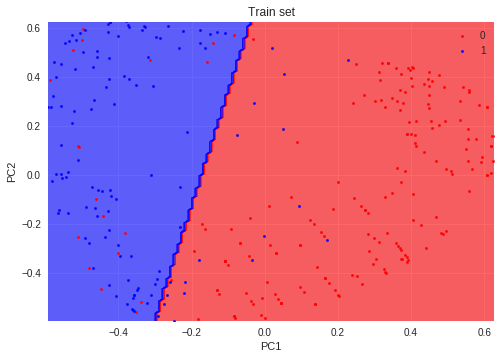

In [11]:
plt.style.use('seaborn')
plot_colormap(train_x_values, train_y_values, classifier,'PC1', 'PC2', 'Train set')

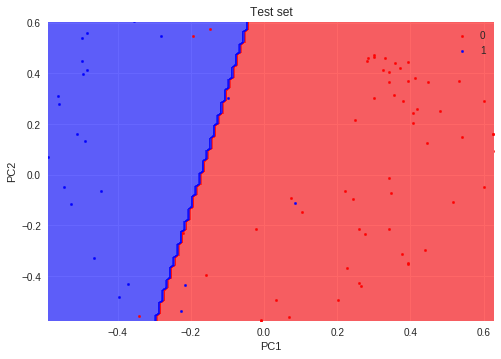

In [12]:
plot_colormap(test_x_values, test_y_values, classifier,'PC1', 'PC2','Test set')